In [5518]:
AB_lengths = []

In [5519]:
import numpy as np

In [5520]:
import math

In [5521]:
def normalize(data): 
    min_data = min(data) 
    max_data = max(data)
    data = np.array([( (d-min_data) / (max_data-min_data) ) for d in data])
    return data

In [5522]:
def normalize_2D(matrix): 
    min_matrix = matrix.min() 
    max_matrix = matrix.max()
    matrix = (matrix-min_matrix) / (max_matrix-min_matrix)
    return matrix
    #matrix = np.array([[( (y-min_data) / (max_data-min_data) ) for y in x] for x in matrix])

In [5523]:
from sklearn.datasets.samples_generator import make_blobs

In [5524]:
AG, y = make_blobs(n_samples=20, centers=3, n_features=2, random_state=0)

In [5525]:
AG

array([[ 1.12031365,  5.75806083],
       [-1.91423083,  2.61557951],
       [ 1.28933778,  3.44969159],
       [ 2.21021495,  1.27582618],
       [ 4.32502215, -0.55670201],
       [-2.57545698,  1.49786432],
       [-3.2331742 ,  4.86865766],
       [ 1.16748177, -1.08313281],
       [ 0.87305123,  4.71438583],
       [ 1.9263585 ,  4.15243012],
       [ 3.58804674,  2.36702243],
       [ 2.47034915,  4.09862906],
       [-0.49772229,  1.55128226],
       [ 2.10102604,  0.71047981],
       [ 1.7373078 ,  4.42546234],
       [-2.03655619,  2.47980796],
       [-0.29661333,  4.12026211],
       [-1.87481616,  3.07423123],
       [ 2.91970372,  0.15549864],
       [ 1.42013331,  4.63746165]])

In [5526]:
p_select, n_clones, learn_rate, OMEGA, M_threshold = 0.9, 100, 1, 0.5, 0.9

In [5527]:
AB = np.random.rand(10,2)*10

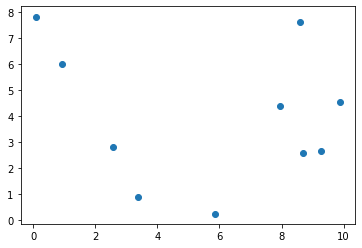

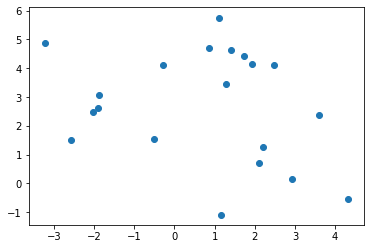

In [5528]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.scatter(AB[:,0], AB[:,1])
plt.savefig("AB.png")
plt.show()

plt.close()

plt.scatter(AG[:,0], AG[:,1])
plt.savefig("AG.png")
plt.show()

plt.close()

In [5529]:
AG

array([[ 1.12031365,  5.75806083],
       [-1.91423083,  2.61557951],
       [ 1.28933778,  3.44969159],
       [ 2.21021495,  1.27582618],
       [ 4.32502215, -0.55670201],
       [-2.57545698,  1.49786432],
       [-3.2331742 ,  4.86865766],
       [ 1.16748177, -1.08313281],
       [ 0.87305123,  4.71438583],
       [ 1.9263585 ,  4.15243012],
       [ 3.58804674,  2.36702243],
       [ 2.47034915,  4.09862906],
       [-0.49772229,  1.55128226],
       [ 2.10102604,  0.71047981],
       [ 1.7373078 ,  4.42546234],
       [-2.03655619,  2.47980796],
       [-0.29661333,  4.12026211],
       [-1.87481616,  3.07423123],
       [ 2.91970372,  0.15549864],
       [ 1.42013331,  4.63746165]])

In [5530]:
AB

array([[8.68792138, 2.58603621],
       [9.87951241, 4.53333959],
       [5.84756811, 0.26332996],
       [2.55662937, 2.81998777],
       [7.96328362, 4.38809686],
       [9.27478349, 2.65584731],
       [3.38024387, 0.89376625],
       [8.59356123, 7.63605948],
       [0.917841  , 5.99977047],
       [0.09234968, 7.82976379]])

In [5531]:
D = [[np.linalg.norm(ag-ab) for ab in AB] for ag in AG]

In [5532]:
D

[[8.205511989754482,
  8.844405297993331,
  7.248379275466917,
  3.2703633091459654,
  6.978756284401678,
  8.724626476310094,
  5.36364115203737,
  7.705602396924236,
  0.31530734330741284,
  2.3127176815924546],
 [10.602193374480546,
  11.948647762625535,
  8.110400773125889,
  4.475530546504769,
  10.035293189571194,
  11.189086781801167,
  5.567414417233181,
  11.645553362107542,
  4.412865205420326,
  5.586956510427269],
 [7.448821378480704,
  8.658255781078196,
  5.561507363483687,
  1.4151165574876916,
  6.739596240017973,
  8.02480728449967,
  3.302217833309043,
  8.418869064980726,
  2.57699673274345,
  4.540684202986486],
 [6.608882733171348,
  8.33243764950312,
  3.7756438662978886,
  1.5825416183185441,
  6.54095007476496,
  7.198096071345815,
  1.2308279641493565,
  9.011086361791932,
  4.897538164578746,
  6.887630327802715],
 [5.37695948421899,
  7.533982055179672,
  1.7293347376837713,
  3.811724926756523,
  6.139053868602241,
  5.900899131825788,
  1.7310298014795167,


In [5533]:
D=np.array(D)

In [5534]:
D

array([[ 8.20551199,  8.8444053 ,  7.24837928,  3.27036331,  6.97875628,
         8.72462648,  5.36364115,  7.7056024 ,  0.31530734,  2.31271768],
       [10.60219337, 11.94864776,  8.11040077,  4.47553055, 10.03529319,
        11.18908678,  5.56741442, 11.64555336,  4.41286521,  5.58695651],
       [ 7.44882138,  8.65825578,  5.56150736,  1.41511656,  6.73959624,
         8.02480728,  3.30221783,  8.41886906,  2.57699673,  4.5406842 ],
       [ 6.60888273,  8.33243765,  3.77564387,  1.58254162,  6.54095007,
         7.19809607,  1.23082796,  9.01108636,  4.89753816,  6.88763033],
       [ 5.37695948,  7.53398206,  1.72933474,  3.81172493,  6.13905387,
         5.90089913,  1.7310298 ,  9.23806077,  7.38892514,  9.39405796],
       [11.31582123, 12.8195309 ,  8.51301513,  5.29965288, 10.92787708,
        11.906684  ,  5.98625986, 12.74458346,  5.69827077,  6.87096378],
       [12.13766372, 13.1169733 , 10.18179376,  6.14156932, 11.2067661 ,
        12.70218624,  7.7160262 , 12.14620039

In [5535]:
# Select the n highest affinity cells. 
# The cells with the least distance are first in the argsorted lists. 
H = [list(AB[d[0]]) for d in D.argsort()]

In [5536]:
H

[[0.917841002978641, 5.999770470276882],
 [0.917841002978641, 5.999770470276882],
 [2.556629370244108, 2.819987771203578],
 [3.380243873506006, 0.8937662512893463],
 [5.847568106005285, 0.26332995597611375],
 [2.556629370244108, 2.819987771203578],
 [0.917841002978641, 5.999770470276882],
 [3.380243873506006, 0.8937662512893463],
 [0.917841002978641, 5.999770470276882],
 [2.556629370244108, 2.819987771203578],
 [2.556629370244108, 2.819987771203578],
 [2.556629370244108, 2.819987771203578],
 [2.556629370244108, 2.819987771203578],
 [3.380243873506006, 0.8937662512893463],
 [0.917841002978641, 5.999770470276882],
 [0.917841002978641, 5.999770470276882],
 [0.917841002978641, 5.999770470276882],
 [0.917841002978641, 5.999770470276882],
 [3.380243873506006, 0.8937662512893463],
 [0.917841002978641, 5.999770470276882]]

In [5537]:
# Store the affinity values of the highest affinity cells. 
# H and HD map directly to one another. 
# So, the affinity of the first cell in H is the first value in HD. 
HD = [D[i][d[0]] for (i,d) in enumerate(D.argsort())]

In [5538]:
HD

[0.31530734330741284,
 4.412865205420326,
 1.4151165574876916,
 1.2308279641493565,
 1.7293347376837713,
 5.299652884674404,
 4.3023648665170695,
 2.967228673633521,
 1.2861647635861324,
 1.4739891402016447,
 1.1264987272210376,
 1.2815489967003628,
 3.3073671972139804,
 1.292281775926088,
 1.7748160226120162,
 4.595497674787802,
 2.2377334534876185,
 4.0444670709513675,
 0.870135793593545,
 1.4519582885382687]

In [5539]:
# Pair the HAF cells with HD affinities for sorting. 
Hab = [(a,b) for a,b in zip(H,HD)]

In [5540]:
Hab

[([0.917841002978641, 5.999770470276882], 0.31530734330741284),
 ([0.917841002978641, 5.999770470276882], 4.412865205420326),
 ([2.556629370244108, 2.819987771203578], 1.4151165574876916),
 ([3.380243873506006, 0.8937662512893463], 1.2308279641493565),
 ([5.847568106005285, 0.26332995597611375], 1.7293347376837713),
 ([2.556629370244108, 2.819987771203578], 5.299652884674404),
 ([0.917841002978641, 5.999770470276882], 4.3023648665170695),
 ([3.380243873506006, 0.8937662512893463], 2.967228673633521),
 ([0.917841002978641, 5.999770470276882], 1.2861647635861324),
 ([2.556629370244108, 2.819987771203578], 1.4739891402016447),
 ([2.556629370244108, 2.819987771203578], 1.1264987272210376),
 ([2.556629370244108, 2.819987771203578], 1.2815489967003628),
 ([2.556629370244108, 2.819987771203578], 3.3073671972139804),
 ([3.380243873506006, 0.8937662512893463], 1.292281775926088),
 ([0.917841002978641, 5.999770470276882], 1.7748160226120162),
 ([0.917841002978641, 5.999770470276882], 4.595497674

In [5541]:
Hab = sorted(Hab, key=lambda k:k[1])

In [5542]:
Hab

[([0.917841002978641, 5.999770470276882], 0.31530734330741284),
 ([3.380243873506006, 0.8937662512893463], 0.870135793593545),
 ([2.556629370244108, 2.819987771203578], 1.1264987272210376),
 ([3.380243873506006, 0.8937662512893463], 1.2308279641493565),
 ([2.556629370244108, 2.819987771203578], 1.2815489967003628),
 ([0.917841002978641, 5.999770470276882], 1.2861647635861324),
 ([3.380243873506006, 0.8937662512893463], 1.292281775926088),
 ([2.556629370244108, 2.819987771203578], 1.4151165574876916),
 ([0.917841002978641, 5.999770470276882], 1.4519582885382687),
 ([2.556629370244108, 2.819987771203578], 1.4739891402016447),
 ([5.847568106005285, 0.26332995597611375], 1.7293347376837713),
 ([0.917841002978641, 5.999770470276882], 1.7748160226120162),
 ([0.917841002978641, 5.999770470276882], 2.2377334534876185),
 ([3.380243873506006, 0.8937662512893463], 2.967228673633521),
 ([2.556629370244108, 2.819987771203578], 3.3073671972139804),
 ([0.917841002978641, 5.999770470276882], 4.0444670

In [5543]:
select = math.ceil(len(Hab)*p_select)

In [5544]:
select

18

In [5545]:
Hab = Hab[:select]

In [5546]:
Hab

[([0.917841002978641, 5.999770470276882], 0.31530734330741284),
 ([3.380243873506006, 0.8937662512893463], 0.870135793593545),
 ([2.556629370244108, 2.819987771203578], 1.1264987272210376),
 ([3.380243873506006, 0.8937662512893463], 1.2308279641493565),
 ([2.556629370244108, 2.819987771203578], 1.2815489967003628),
 ([0.917841002978641, 5.999770470276882], 1.2861647635861324),
 ([3.380243873506006, 0.8937662512893463], 1.292281775926088),
 ([2.556629370244108, 2.819987771203578], 1.4151165574876916),
 ([0.917841002978641, 5.999770470276882], 1.4519582885382687),
 ([2.556629370244108, 2.819987771203578], 1.4739891402016447),
 ([5.847568106005285, 0.26332995597611375], 1.7293347376837713),
 ([0.917841002978641, 5.999770470276882], 1.7748160226120162),
 ([0.917841002978641, 5.999770470276882], 2.2377334534876185),
 ([3.380243873506006, 0.8937662512893463], 2.967228673633521),
 ([2.556629370244108, 2.819987771203578], 3.3073671972139804),
 ([0.917841002978641, 5.999770470276882], 4.0444670

In [5547]:
D = [hab[1] for hab in Hab]

In [5548]:
H = [hab[0] for hab in Hab] 

In [5549]:
H

[[0.917841002978641, 5.999770470276882],
 [3.380243873506006, 0.8937662512893463],
 [2.556629370244108, 2.819987771203578],
 [3.380243873506006, 0.8937662512893463],
 [2.556629370244108, 2.819987771203578],
 [0.917841002978641, 5.999770470276882],
 [3.380243873506006, 0.8937662512893463],
 [2.556629370244108, 2.819987771203578],
 [0.917841002978641, 5.999770470276882],
 [2.556629370244108, 2.819987771203578],
 [5.847568106005285, 0.26332995597611375],
 [0.917841002978641, 5.999770470276882],
 [0.917841002978641, 5.999770470276882],
 [3.380243873506006, 0.8937662512893463],
 [2.556629370244108, 2.819987771203578],
 [0.917841002978641, 5.999770470276882],
 [0.917841002978641, 5.999770470276882],
 [0.917841002978641, 5.999770470276882]]

In [5550]:
D

[0.31530734330741284,
 0.870135793593545,
 1.1264987272210376,
 1.2308279641493565,
 1.2815489967003628,
 1.2861647635861324,
 1.292281775926088,
 1.4151165574876916,
 1.4519582885382687,
 1.4739891402016447,
 1.7293347376837713,
 1.7748160226120162,
 2.2377334534876185,
 2.967228673633521,
 3.3073671972139804,
 4.0444670709513675,
 4.3023648665170695,
 4.412865205420326]

In [5551]:
D_array = np.array(D)

In [5552]:
D_array

array([0.31530734, 0.87013579, 1.12649873, 1.23082796, 1.281549  ,
       1.28616476, 1.29228178, 1.41511656, 1.45195829, 1.47398914,
       1.72933474, 1.77481602, 2.23773345, 2.96722867, 3.3073672 ,
       4.04446707, 4.30236487, 4.41286521])

In [5553]:
Dnorm = (D_array-D_array.min()) / (D_array.max() - D_array.min())

In [5554]:
Dnorm

array([0.        , 0.13540467, 0.19796948, 0.2234308 , 0.23580915,
       0.23693562, 0.23842847, 0.26840602, 0.27739717, 0.28277375,
       0.34509028, 0.35618989, 0.46916387, 0.64719558, 0.73020564,
       0.91009324, 0.97303263, 1.        ])

In [5555]:
D = np.array([1])-Dnorm

In [5556]:
D

array([1.        , 0.86459533, 0.80203052, 0.7765692 , 0.76419085,
       0.76306438, 0.76157153, 0.73159398, 0.72260283, 0.71722625,
       0.65490972, 0.64381011, 0.53083613, 0.35280442, 0.26979436,
       0.08990676, 0.02696737, 0.        ])

In [5557]:
N = D*n_clones

In [5558]:
N=N.astype(int)

In [5559]:
N

array([100,  86,  80,  77,  76,  76,  76,  73,  72,  71,  65,  64,  53,
        35,  26,   8,   2,   0])

In [5560]:
H = np.repeat(H,N,axis=0)

In [5561]:
H

array([[0.917841  , 5.99977047],
       [0.917841  , 5.99977047],
       [0.917841  , 5.99977047],
       ...,
       [0.917841  , 5.99977047],
       [0.917841  , 5.99977047],
       [0.917841  , 5.99977047]])

In [5562]:
H = np.array([h-learn_rate*(h-AG) for h in H])

In [5563]:
H

array([[[ 1.12031365,  5.75806083],
        [-1.91423083,  2.61557951],
        [ 1.28933778,  3.44969159],
        ...,
        [-1.87481616,  3.07423123],
        [ 2.91970372,  0.15549864],
        [ 1.42013331,  4.63746165]],

       [[ 1.12031365,  5.75806083],
        [-1.91423083,  2.61557951],
        [ 1.28933778,  3.44969159],
        ...,
        [-1.87481616,  3.07423123],
        [ 2.91970372,  0.15549864],
        [ 1.42013331,  4.63746165]],

       [[ 1.12031365,  5.75806083],
        [-1.91423083,  2.61557951],
        [ 1.28933778,  3.44969159],
        ...,
        [-1.87481616,  3.07423123],
        [ 2.91970372,  0.15549864],
        [ 1.42013331,  4.63746165]],

       ...,

       [[ 1.12031365,  5.75806083],
        [-1.91423083,  2.61557951],
        [ 1.28933778,  3.44969159],
        ...,
        [-1.87481616,  3.07423123],
        [ 2.91970372,  0.15549864],
        [ 1.42013331,  4.63746165]],

       [[ 1.12031365,  5.75806083],
        [-1.91423083,  2.61

In [5564]:
H = np.reshape(H, (H.shape[0]*H.shape[1], H.shape[2]))

In [5565]:
H

array([[ 1.12031365,  5.75806083],
       [-1.91423083,  2.61557951],
       [ 1.28933778,  3.44969159],
       ...,
       [-1.87481616,  3.07423123],
       [ 2.91970372,  0.15549864],
       [ 1.42013331,  4.63746165]])

In [5566]:
D = np.array([[np.linalg.norm(ag-ab) for ab in H] for ag in AG])

In [5567]:
D

array([[0.00000000e+00, 4.36848361e+00, 2.31454914e+00, ...,
        4.02165935e+00, 5.88442926e+00, 1.16001481e+00],
       [4.36848361e+00, 0.00000000e+00, 3.31037684e+00, ...,
        4.60342173e-01, 5.42392120e+00, 3.89948607e+00],
       [2.31454914e+00, 3.31037684e+00, 0.00000000e+00, ...,
        3.18635225e+00, 3.67556802e+00, 1.19494987e+00],
       ...,
       [4.02165935e+00, 4.60342173e-01, 3.18635225e+00, ...,
        2.22044605e-16, 5.61305807e+00, 3.64696880e+00],
       [5.88442926e+00, 5.42392120e+00, 3.67556802e+00, ...,
        5.61305807e+00, 1.11022302e-16, 4.72617222e+00],
       [1.16001481e+00, 3.89948607e+00, 1.19494987e+00, ...,
        3.64696880e+00, 4.72617222e+00, 0.00000000e+00]])

In [5568]:
D.shape

(20, 20800)

In [5569]:
HD = [D[i][d[0]] for (i,d) in enumerate(D.argsort())]

In [5570]:
HD

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.220446049250313e-16,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.220446049250313e-16,
 0.0,
 0.0]

In [5571]:
H=[H[d[0]].tolist() for d in D.argsort()]

In [5572]:
H

[[1.1203136497073731, 5.758060834411365],
 [-1.9142308306298577, 2.615579510757787],
 [1.2893377801973964, 3.449691588146665],
 [2.2102149471297943, 1.2758261795401105],
 [4.325022145420485, -0.5567020146608279],
 [-2.5754569782889982, 1.4978643241541478],
 [-3.233174203846918, 4.8686576565649125],
 [1.1674817738027652, -1.0831328082859901],
 [0.8730512267529372, 4.714385829386762],
 [1.9263584960720843, 4.152430119150692],
 [3.5880467357913357, 2.367022429838222],
 [2.4703491517041014, 4.098629063682589],
 [-0.49772229440120075, 1.5512822553782974],
 [2.101026038734324, 0.7104798099121032],
 [1.7373078036934886, 4.425462343941218],
 [-2.036556194973559, 2.4798079597219362],
 [-0.29661333249418464, 4.120262110117534],
 [-1.8748161625480582, 3.074231230437103],
 [2.9197037202923837, 0.1554986395314949],
 [1.4201333112919208, 4.637461654822657]]

In [5573]:
Hab = H

In [5574]:
Hab

[[1.1203136497073731, 5.758060834411365],
 [-1.9142308306298577, 2.615579510757787],
 [1.2893377801973964, 3.449691588146665],
 [2.2102149471297943, 1.2758261795401105],
 [4.325022145420485, -0.5567020146608279],
 [-2.5754569782889982, 1.4978643241541478],
 [-3.233174203846918, 4.8686576565649125],
 [1.1674817738027652, -1.0831328082859901],
 [0.8730512267529372, 4.714385829386762],
 [1.9263584960720843, 4.152430119150692],
 [3.5880467357913357, 2.367022429838222],
 [2.4703491517041014, 4.098629063682589],
 [-0.49772229440120075, 1.5512822553782974],
 [2.101026038734324, 0.7104798099121032],
 [1.7373078036934886, 4.425462343941218],
 [-2.036556194973559, 2.4798079597219362],
 [-0.29661333249418464, 4.120262110117534],
 [-1.8748161625480582, 3.074231230437103],
 [2.9197037202923837, 0.1554986395314949],
 [1.4201333112919208, 4.637461654822657]]

In [5575]:
OMEGA # STORE ALL THE HIGH AFFINITY CELLS.

0.5

In [5576]:
M = Hab[:int(OMEGA*len(Hab))]

In [5577]:
M

[[1.1203136497073731, 5.758060834411365],
 [-1.9142308306298577, 2.615579510757787],
 [1.2893377801973964, 3.449691588146665],
 [2.2102149471297943, 1.2758261795401105],
 [4.325022145420485, -0.5567020146608279],
 [-2.5754569782889982, 1.4978643241541478],
 [-3.233174203846918, 4.8686576565649125],
 [1.1674817738027652, -1.0831328082859901],
 [0.8730512267529372, 4.714385829386762],
 [1.9263584960720843, 4.152430119150692]]

In [5578]:
M = np.array(M)

In [5579]:
M

array([[ 1.12031365,  5.75806083],
       [-1.91423083,  2.61557951],
       [ 1.28933778,  3.44969159],
       [ 2.21021495,  1.27582618],
       [ 4.32502215, -0.55670201],
       [-2.57545698,  1.49786432],
       [-3.2331742 ,  4.86865766],
       [ 1.16748177, -1.08313281],
       [ 0.87305123,  4.71438583],
       [ 1.9263585 ,  4.15243012]])

In [5580]:
# Clonal suppression. 
S = np.array([[np.linalg.norm(np.array(mx)-np.array(my)) for mx in M] for my in M])

In [5581]:
S

array([[0.        , 4.36848361, 2.31454914, 4.61284211, 7.08141133,
        5.6398577 , 4.44341023, 6.84135625, 1.07256525, 1.79659631],
       [4.36848361, 0.        , 3.31037684, 4.33658759, 6.99940339,
        1.29865594, 2.6107418 , 4.81429386, 3.48911582, 4.1366697 ],
       [2.31454914, 3.31037684, 0.        , 2.36086966, 5.02658624,
        4.32969609, 4.73989234, 4.53446203, 1.33144509, 0.94849187],
       [4.61284211, 4.33658759, 2.36086966, 0.        , 2.7983154 ,
        4.79082005, 6.52218702, 2.57914326, 3.68940365, 2.89057515],
       [7.08141133, 6.99940339, 5.02658624, 2.7983154 , 0.        ,
        7.19985104, 9.30380888, 3.20112333, 6.30083092, 5.28483801],
       [5.6398577 , 1.29865594, 4.32969609, 4.79082005, 7.19985104,
        0.        , 3.43436161, 4.54655218, 4.71574166, 5.22619002],
       [4.44341023, 2.6107418 , 4.73989234, 6.52218702, 9.30380888,
        3.43436161, 0.        , 7.40199857, 4.10912242, 5.20900754],
       [6.84135625, 4.81429386, 4.5344620

In [5582]:
S=normalize_2D(S)

In [5583]:
S

array([[0.        , 0.46953712, 0.24877436, 0.49580147, 0.76113035,
        0.60618804, 0.47759045, 0.73532855, 0.11528238, 0.19310331],
       [0.46953712, 0.        , 0.35580877, 0.46610884, 0.7523159 ,
        0.13958326, 0.28061   , 0.51745408, 0.37502015, 0.4446211 ],
       [0.24877436, 0.35580877, 0.        , 0.25375303, 0.54027187,
        0.46536812, 0.50945719, 0.48737695, 0.14310753, 0.10194662],
       [0.49580147, 0.46610884, 0.25375303, 0.        , 0.30077095,
        0.51493105, 0.70102332, 0.2772137 , 0.39654766, 0.31068729],
       [0.76113035, 0.7523159 , 0.54027187, 0.30077095, 0.        ,
        0.77386059, 1.        , 0.3440659 , 0.67723134, 0.56802951],
       [0.60618804, 0.13958326, 0.46536812, 0.51493105, 0.77386059,
        0.        , 0.36913501, 0.48867644, 0.50686141, 0.56172586],
       [0.47759045, 0.28061   , 0.50945719, 0.70102332, 1.        ,
        0.36913501, 0.        , 0.79558799, 0.44166024, 0.55987904],
       [0.73532855, 0.51745408, 0.4873769

In [5584]:
S=[[S[i][j] if j >= i+1 else 0 for j in range(S.shape[1])] for i in range(S.shape[0]-1)]

In [5585]:
S=np.array(S)

In [5586]:
np.argwhere(S>M_threshold)[:,1]

array([6])

In [5587]:
Mp=M[np.argwhere(S>M_threshold)[:,1]]

In [5588]:
Mp=np.array(list(set([tuple(mp) for mp in Mp])))

In [5589]:
#S = np.array([[np.linalg.norm(np.array(m)-np.array(ab)) for ab in AB] for m in M])

In [5590]:
#S=normalize_2D(S)

In [5591]:
#AB=AB[np.argwhere(S>M_threshold)[:,1]]

In [5592]:
#AB=np.array(list(set([tuple(ab) for ab in AB])))

In [5593]:
AB=np.append(AB,Mp,axis=0)

In [5594]:
AB.shape

(11, 2)

In [5595]:
Mp.shape

(1, 2)

In [5596]:
with open("ais.txt", "w+") as of: 
    of.write(np.array2string(AB, separator=',') + "\n")
    of.close()

In [5597]:
print (AB_lengths)

[]


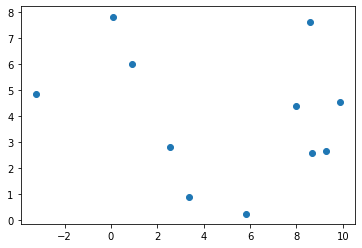

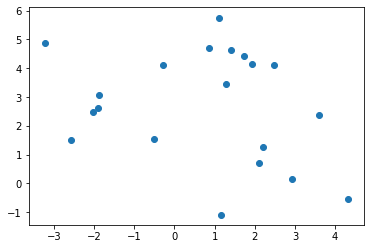

In [5598]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.scatter(AB[:,0], AB[:,1])
plt.savefig("AB.png")
plt.show()

plt.close()

plt.scatter(AG[:,0], AG[:,1])
plt.savefig("AG.png")
plt.show()

plt.close()